הקטע קוד הראשון מייצר את גרף של הקורולציה לפי סרטים לנותנים של גודל האישון 
אתה יכול לשנות את העמודה שאתה רוצה לעשות עליה קורולציה
ואתה צריך להביא לו את התיקייה שבתוכה נמצאים כל התיקיות עם הקבצים 
יש אפשרות להגדיר כמות נבדקים וכמות סרטים 
והיא מוציאה מטריצה 


החלק קוד השני מוציא גרף קורולציה לנתונים הפיזיולוגים 

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.graph_objs as go
from numpy import array, mean, std
import biosignalsnotebooks as bsnb

Movie 1:
  Average Correlation Coefficient: 0.4723183484093407
  Standard Error of Mean: 2.1375449443914613e-16

Movie 2:
  Average Correlation Coefficient: 0.40935458202864844
  Standard Error of Mean: 0.05856403327360773

Movie 3:
  Average Correlation Coefficient: 0.3926174006029158
  Standard Error of Mean: 1.6430300611659147e-16

Movie 4:
  Average Correlation Coefficient: 0.18326053926391175
  Standard Error of Mean: 0.030407747015970047

Movie 5:
  Average Correlation Coefficient: 0.4649078200659668
  Standard Error of Mean: 1.842640272741595e-16

Movie 6:
  Average Correlation Coefficient: 0.4561949224656804
  Standard Error of Mean: 1.421969219268009e-16



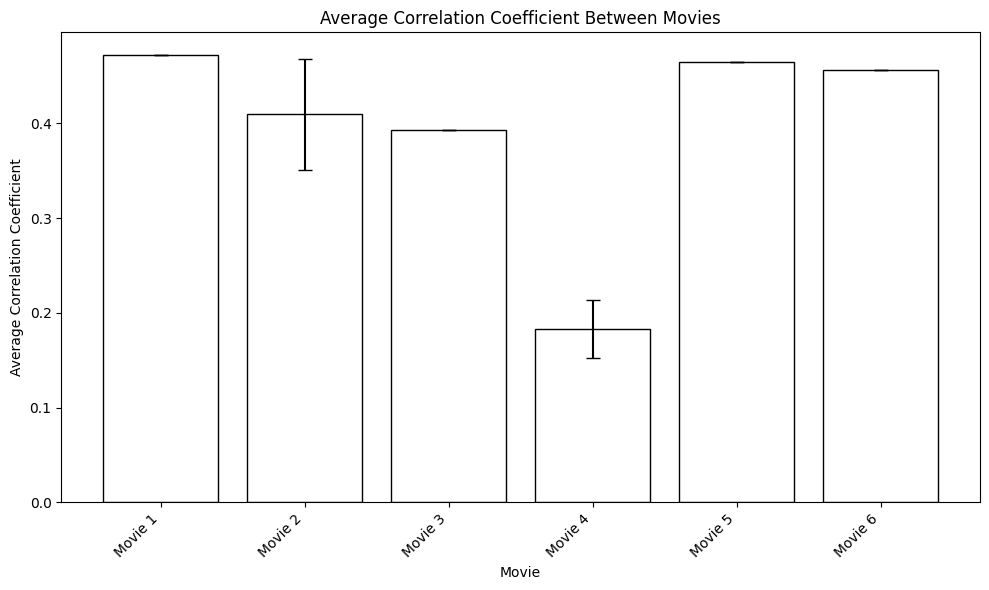

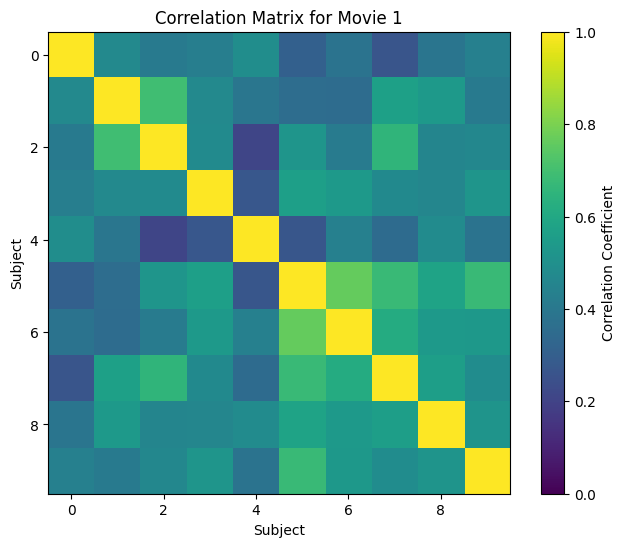

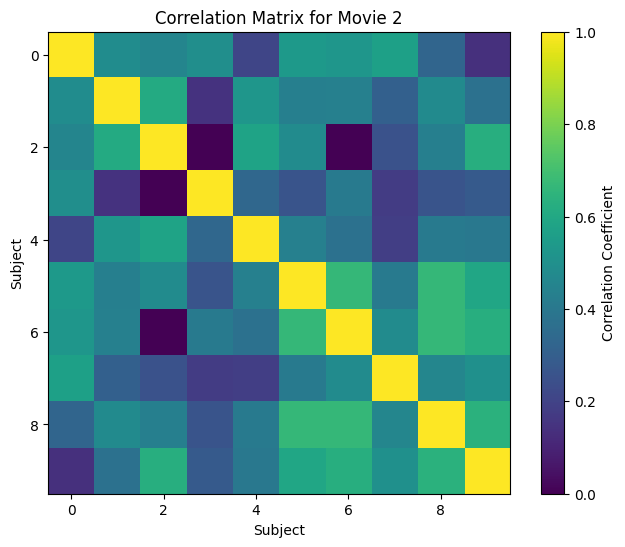

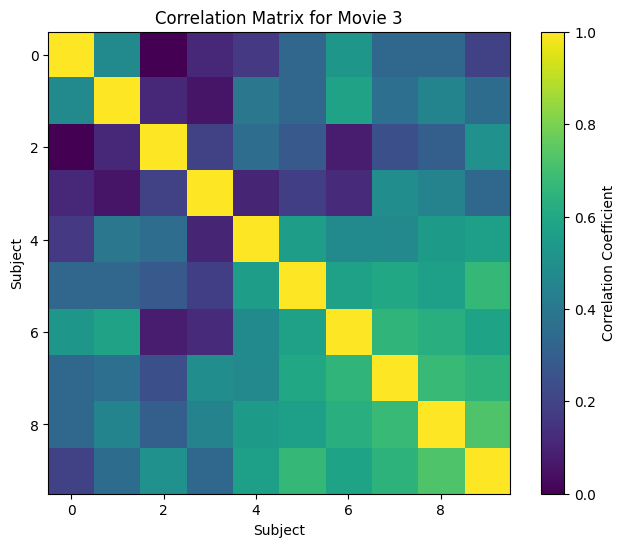

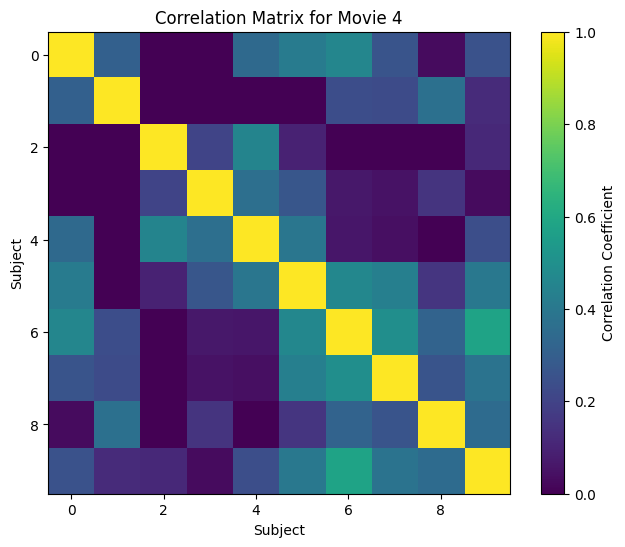

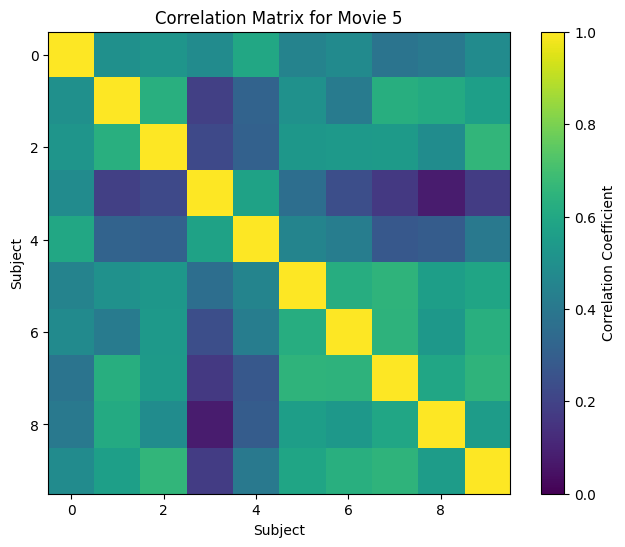

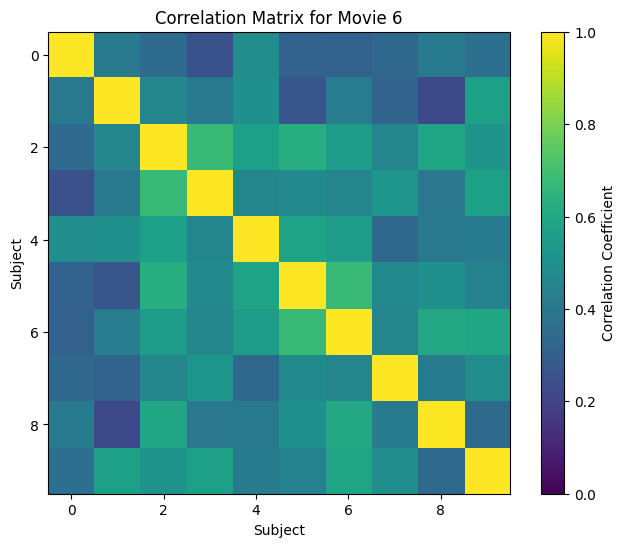

In [2]:
#SEM

def calculate_average_correlation(dataframes):
    total_correlation = 0
    num_correlations = 0
    
    for i in range(len(dataframes)):
        for j in range(i + 1, len(dataframes)):
            correlation = dataframes[i]['z_score_pupil Diameter_average'].corr(dataframes[j]['z_score_pupil Diameter_average'])
            total_correlation += correlation
            num_correlations += 1
            
    if num_correlations == 0:
        return 0  # Avoid division by zero
        
    average_correlation = total_correlation / num_correlations
    return average_correlation

def calculate_correlation_matrix(dataframes):
    num_subjects = len(dataframes)
    correlation_matrix = np.zeros((num_subjects, num_subjects))
    
    for i in range(num_subjects):
        for j in range(i, num_subjects):
            correlation = dataframes[i]['z_score_pupil Diameter_average'].corr(dataframes[j]['z_score_pupil Diameter_average'])
            correlation_matrix[i, j] = correlation
            correlation_matrix[j, i] = correlation
    
    return correlation_matrix

def process_movie_data(movie_folder, num_movies, num_files_per_movie):
    average_correlations = []
    dataframes_movie = []
    correlation_matrices = []
    
    for movie_num in range(1, num_movies + 1):
        movie_dataframes = []
        
        for file_num in range(1, num_files_per_movie + 1):
            df = pd.read_csv(fr"{movie_folder}\Subject {file_num}\movie_{movie_num}_processed.csv")
            movie_dataframes.append(df)
        
        dataframes_movie.append(movie_dataframes)
        average_correlation = calculate_average_correlation(movie_dataframes)
        average_correlations.append(average_correlation)
        
        # Calculate and store the correlation matrix
        correlation_matrix = calculate_correlation_matrix(movie_dataframes)
        correlation_matrices.append(correlation_matrix)
    
    return dataframes_movie, average_correlations, correlation_matrices

def plot_correlation_graph(movie_names, average_correlations, sem_values):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(movie_names, average_correlations, color='white', edgecolor='black', linewidth=1, yerr=sem_values, capsize=5)
    
    plt.xlabel('Movie')
    plt.ylabel('Average Correlation Coefficient')
    plt.title('Average Correlation Coefficient Between Movies')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_correlation_matrices(movie_names, correlation_matrices):
    for i, movie_name in enumerate(movie_names):
        plt.figure(figsize=(8, 6))
        plt.imshow(correlation_matrices[i], cmap='viridis', vmin=0, vmax=1)
        plt.colorbar(label='Correlation Coefficient')
        plt.title(f'Correlation Matrix for {movie_name}')
        plt.xlabel('Subject')
        plt.ylabel('Subject')
        plt.show()

movie_folder = r"C:\Users\isc\Desktop\project"
num_movies = 6
num_files_per_movie = 10

movie_names = [f"Movie {i}" for i in range(1, num_movies + 1)]

dataframes_movie, average_correlations, correlation_matrices = process_movie_data(movie_folder, num_movies, num_files_per_movie)

sem_values = [np.std([df['z_score_pupil Diameter_average'].mean() for df in movie_dataframes]) / np.sqrt(num_files_per_movie) for movie_dataframes in dataframes_movie]

for i, movie_name in enumerate(movie_names):
    print(f"{movie_name}:")
    print(f"  Average Correlation Coefficient: {average_correlations[i]}")
    print(f"  Standard Error of Mean: {sem_values[i]}")
    print("")

plot_correlation_graph(movie_names, average_correlations, sem_values)
plot_correlation_matrices(movie_names, correlation_matrices)


Movie 1:
  Average Correlation Coefficient: 0.4723183484093407
  Standard Deviation: 0.31622361231218177

Movie 2:
  Average Correlation Coefficient: 0.3882261548792084
  Standard Deviation: 0.3162268002574655

Movie 3:
  Average Correlation Coefficient: 0.3926174006029158
  Standard Deviation: 0.3162234808264668

Movie 4:
  Average Correlation Coefficient: 0.18272751492279612
  Standard Deviation: 0.31622689537324317

Movie 5:
  Average Correlation Coefficient: 0.4649078200659668
  Standard Deviation: 0.316223572765417

Movie 6:
  Average Correlation Coefficient: 0.4561949224656804
  Standard Deviation: 0.3162263310801224



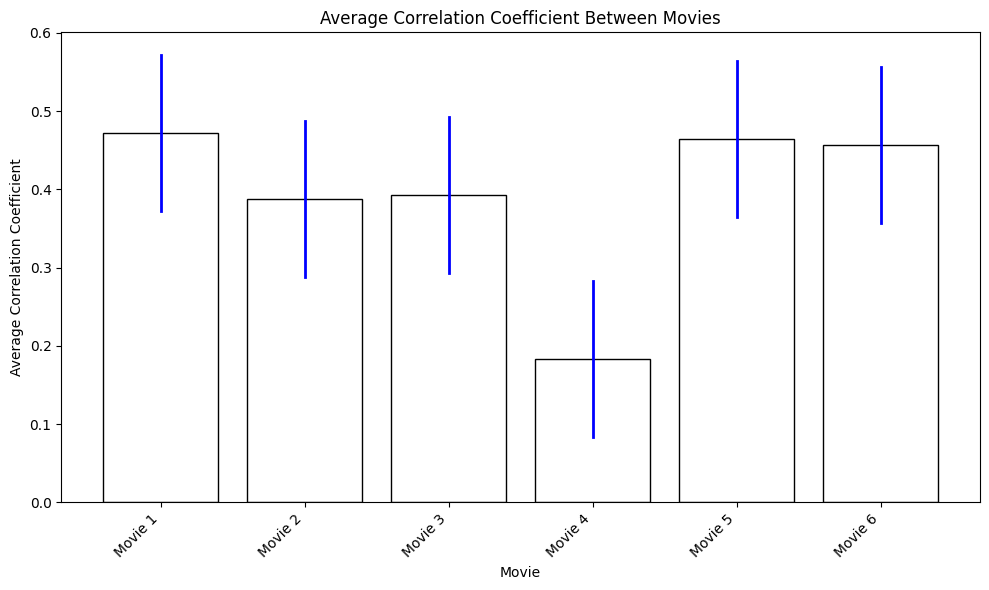

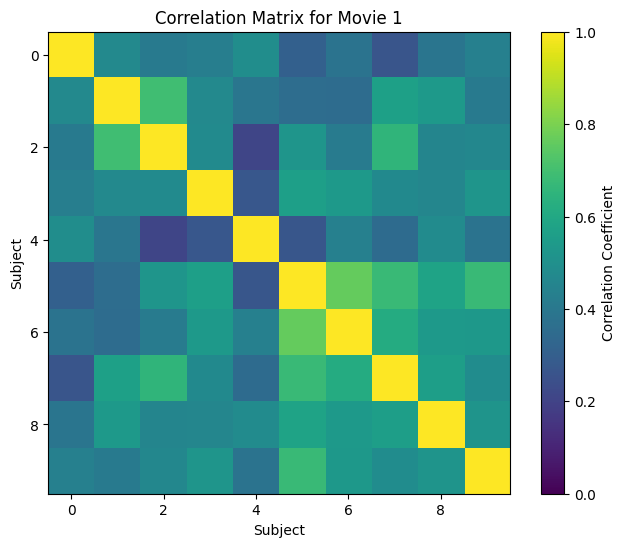

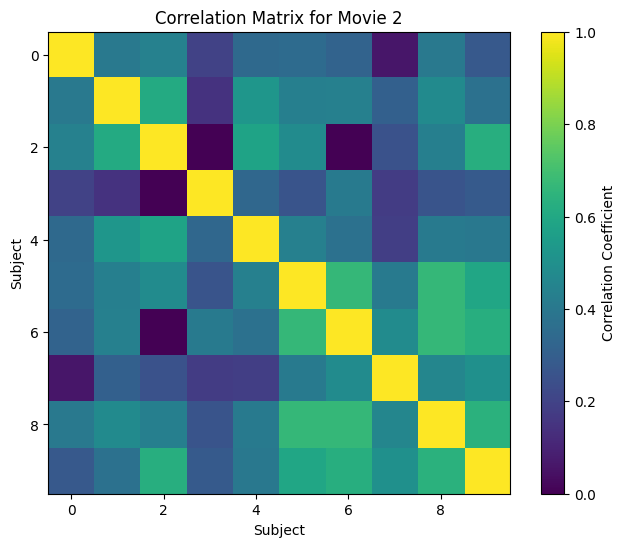

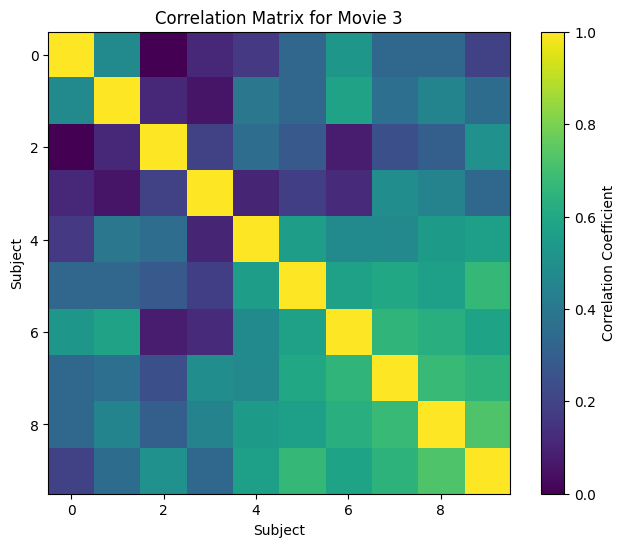

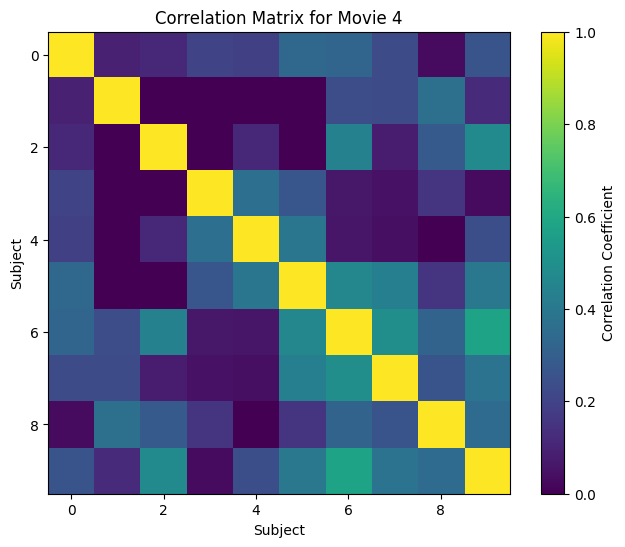

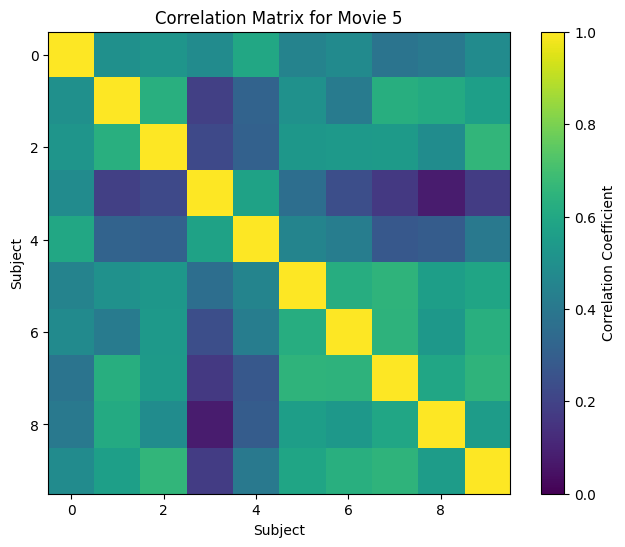

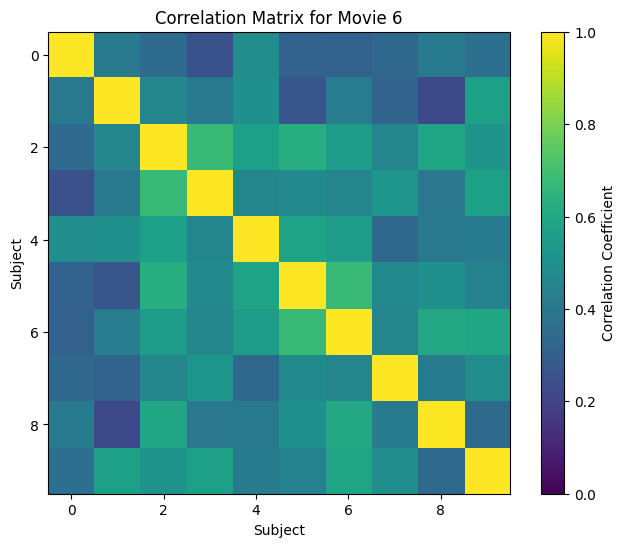

In [3]:
#STD

def calculate_average_correlation(dataframes):
    total_correlation = 0
    num_correlations = 0
    
    for i in range(len(dataframes)):
        for j in range(i + 1, len(dataframes)):
            correlation = dataframes[i]['z_score_pupil Diameter_average'].corr(dataframes[j]['z_score_pupil Diameter_average'])
            total_correlation += correlation
            num_correlations += 1
            
    if num_correlations == 0:
        return 0  # Avoid division by zero
        
    average_correlation = total_correlation / num_correlations
    return average_correlation

def calculate_correlation_matrix(dataframes):
    num_subjects = len(dataframes)
    correlation_matrix = np.zeros((num_subjects, num_subjects))
    
    for i in range(num_subjects):
        for j in range(i, num_subjects):
            correlation = dataframes[i]['z_score_pupil Diameter_average'].corr(dataframes[j]['z_score_pupil Diameter_average'])
            correlation_matrix[i, j] = correlation
            correlation_matrix[j, i] = correlation
    
    return correlation_matrix

def process_movie_data(movie_folder, num_movies, num_files_per_movie):
    average_correlations = []
    dataframes_movie = []
    correlation_matrices = []
    
    for movie_num in range(1, num_movies + 1):
        movie_dataframes = []
        
        for file_num in range(1, num_files_per_movie + 1):
            df = pd.read_csv(fr"{movie_folder}\Subject {file_num}\movie_{movie_num}_processed.csv")
            movie_dataframes.append(df)
        
        dataframes_movie.append(movie_dataframes)
        average_correlation = calculate_average_correlation(movie_dataframes)
        average_correlations.append(average_correlation)
        
        # Calculate and store the correlation matrix
        correlation_matrix = calculate_correlation_matrix(movie_dataframes)
        correlation_matrices.append(correlation_matrix)
    
    return dataframes_movie, average_correlations, correlation_matrices

def plot_correlation_graph(movie_names, average_correlations):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(movie_names, average_correlations, color='white', edgecolor='black', linewidth=1)
    
    std_dev = np.std(average_correlations)
    
    # Add vertical line for standard deviation
    for i, bar in enumerate(bars):
        plt.plot([i, i], [average_correlations[i] - std_dev, average_correlations[i] + std_dev], color='blue', linewidth=2)
    
    plt.xlabel('Movie')
    plt.ylabel('Average Correlation Coefficient')
    plt.title('Average Correlation Coefficient Between Movies')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_correlation_matrices(movie_names, correlation_matrices):
    for i, movie_name in enumerate(movie_names):
        plt.figure(figsize=(8, 6))
        plt.imshow(correlation_matrices[i], cmap='viridis', vmin=0, vmax=1)
        plt.colorbar(label='Correlation Coefficient')
        plt.title(f'Correlation Matrix for {movie_name}')
        plt.xlabel('Subject')
        plt.ylabel('Subject')
        plt.show()

movie_folder = r"C:\Users\isc\Desktop\project"
num_movies = 6  # Update this with the actual number of movies
num_files_per_movie = 10  # Update this with the actual number of files per movie

# Modify your code to get the movie names
movie_names = [f"Movie {i}" for i in range(1, num_movies + 1)]

# Process the movie data
dataframes_movie, average_correlations, correlation_matrices = process_movie_data(movie_folder, num_movies, num_files_per_movie)

# Print the results
for i, movie_name in enumerate(movie_names):
    std_dev_movie = np.std(dataframes_movie[i][0]['z_score_pupil Diameter_average']) / np.sqrt(num_files_per_movie) # Calculate standard deviation for the specific movie
    print(f"{movie_name}:")
    print(f"  Average Correlation Coefficient: {average_correlations[i]}")
    print(f"  Standard Deviation: {std_dev_movie}")
    print("")

# Plot the correlation graph
plot_correlation_graph(movie_names, average_correlations)

# Plot correlation matrices
plot_correlation_matrices(movie_names, correlation_matrices)


Movie 1:
  Average PZT_cleaned Correlation Coefficient: 0.319327990127387
  Standard Error of Mean: 0.02506217189285846

Movie 2:
  Average PZT_cleaned Correlation Coefficient: 0.019141672066304388
  Standard Error of Mean: 0.012427847250036548

Movie 3:
  Average PZT_cleaned Correlation Coefficient: 0.13274009047672441
  Standard Error of Mean: 0.02654362188498318

Movie 4:
  Average PZT_cleaned Correlation Coefficient: 0.08147404559239006
  Standard Error of Mean: 0.008138130543101845

Movie 5:
  Average PZT_cleaned Correlation Coefficient: -0.02594286764856351
  Standard Error of Mean: 0.01962217041800742

Movie 6:
  Average PZT_cleaned Correlation Coefficient: -0.07326681379085916
  Standard Error of Mean: 0.021241851641193837



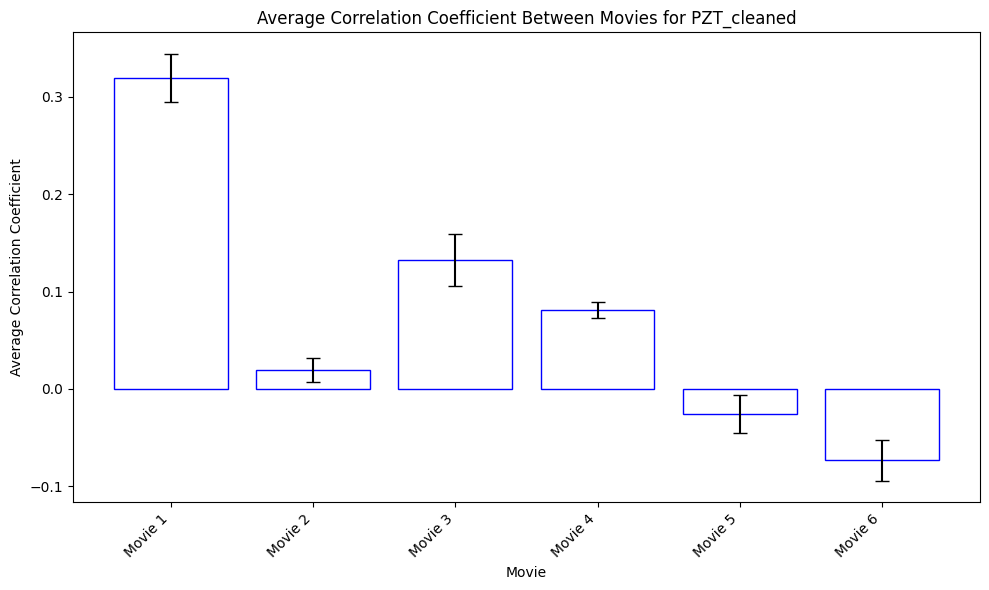

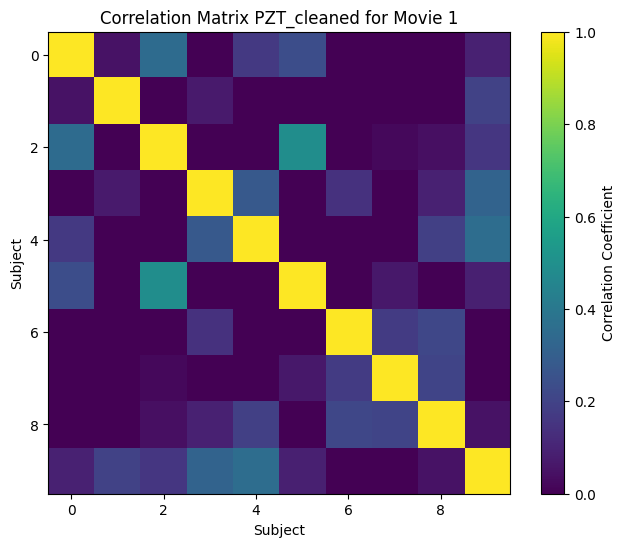

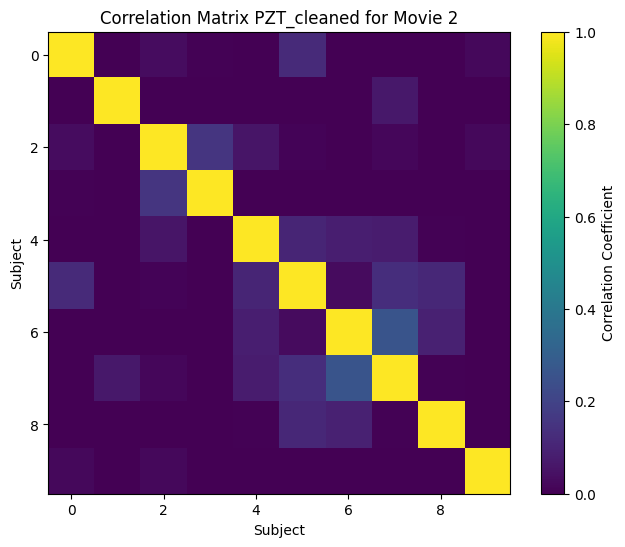

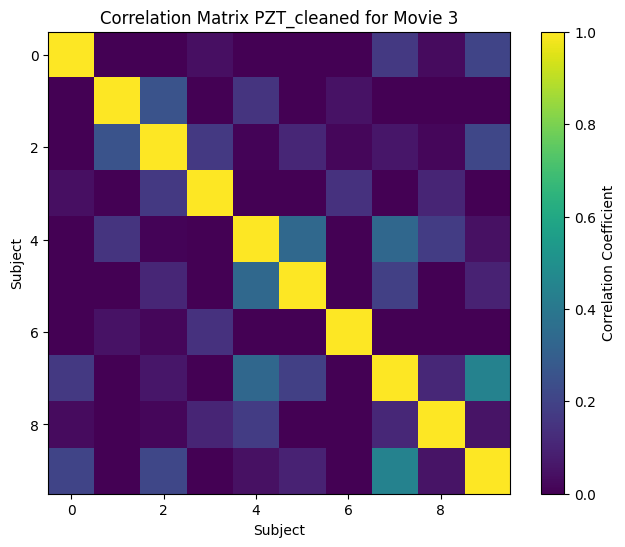

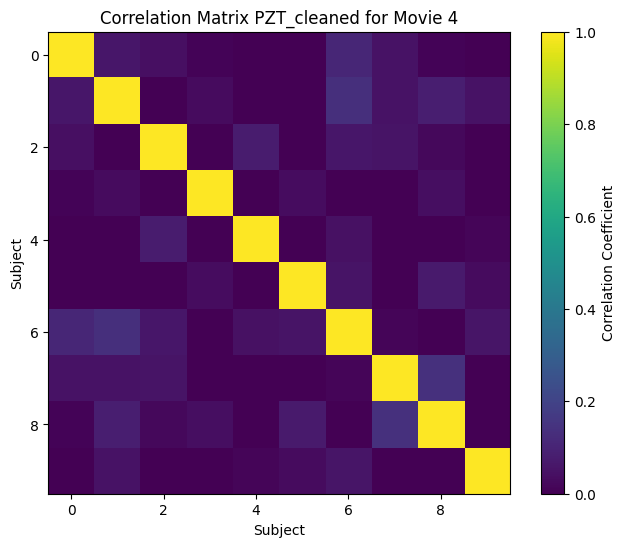

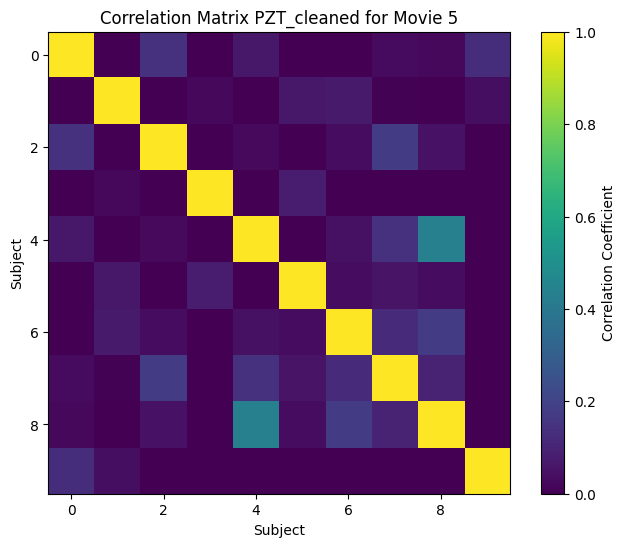

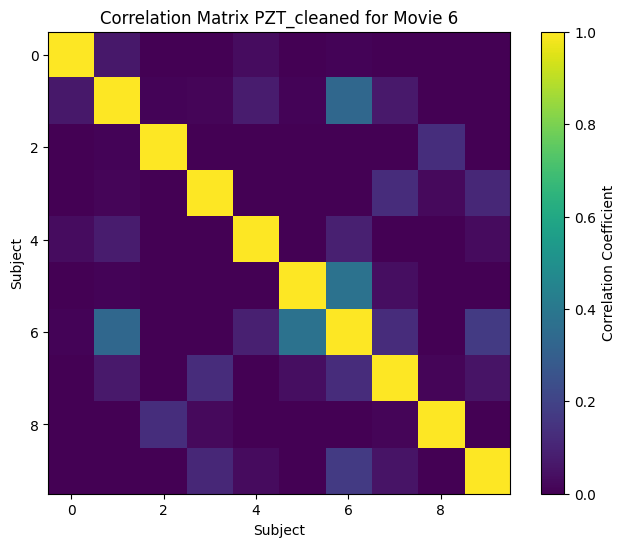

In [4]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

Data = 'PZT_cleaned'

def calculate_average_correlation(dataframes):
    total_correlation = 0
    num_correlations = 0
    
    for i in range(len(dataframes)):
        for j in range(i + 1, len(dataframes)):
            correlation = dataframes[i][Data].corr(dataframes[j][Data])
            total_correlation += correlation
            num_correlations += 1
            
    if num_correlations == 0:
        return 0  # Avoid division by zero
        
    average_correlation = total_correlation / np.sqrt(num_correlations) 
    average_correlation = average_correlation
    
    return average_correlation

def calculate_correlation_matrix(dataframes):
    num_subjects = len(dataframes)
    correlation_matrix = np.zeros((num_subjects, num_subjects))
    
    for i in range(num_subjects):
        for j in range(i, num_subjects):
            correlation = dataframes[i][Data].corr(dataframes[j][Data])
            correlation_matrix[i, j] = correlation
            correlation_matrix[j, i] = correlation
    
    return correlation_matrix

def process_movie_data(movie_folder, num_movies, num_files_per_movie):
    average_correlations = []
    dataframes_movie = []
    correlation_matrices = []
    
    for movie_num in range(1, num_movies + 1):
        movie_dataframes = []
        
        for file_num in range(1, num_files_per_movie + 1):
            df = pd.read_csv(fr"{movie_folder}\Subject {file_num}\movie_{movie_num}_opensignals.csv")
            movie_dataframes.append(df)
        
        dataframes_movie.append(movie_dataframes)
        average_correlation = calculate_average_correlation(movie_dataframes)
        average_correlations.append(average_correlation)
        
        # Calculate and store the correlation matrix
        correlation_matrix = calculate_correlation_matrix(movie_dataframes) 
        correlation_matrices.append(correlation_matrix)
    
    return dataframes_movie, average_correlations, correlation_matrices

def plot_correlation_graph(movie_names, average_correlations, sem_values):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(movie_names, average_correlations, color='white', edgecolor='blue', linewidth=1, yerr=sem_values, capsize=5)
    
    plt.xlabel('Movie')
    plt.ylabel('Average Correlation Coefficient')
    plt.title('Average Correlation Coefficient Between Movies for ' + Data)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_correlation_matrices(movie_names, correlation_matrices):
    for i, movie_name in enumerate(movie_names):
        plt.figure(figsize=(8, 6))
        plt.imshow(correlation_matrices[i], cmap='viridis', vmin=0, vmax=1)
        plt.colorbar(label='Correlation Coefficient')
        plt.title(f'Correlation Matrix ' + Data + f' for {movie_name}')
        plt.xlabel('Subject')
        plt.ylabel('Subject')
        plt.show()

movie_folder = r"C:\Users\isc\Desktop\project"
num_movies = 6  # Update this with the actual number of movies
num_files_per_movie = 10  # Update this with the actual number of files per movie

# Get the movie names
movie_names = [f"Movie {i}" for i in range(1, num_movies + 1)]

# Process the movie data
dataframes_movie, average_correlations, correlation_matrices = process_movie_data(movie_folder, num_movies, num_files_per_movie)

# Calculate SEM values
sem_values = []
for movie_df in dataframes_movie:
    correlations = [df1[Data].corr(df2[Data]) for idx, df1 in enumerate(movie_df) for df2 in movie_df[idx+1:]]
    sem = np.std(correlations) / np.sqrt(len(correlations))
    sem_values.append(sem)

# Print the results
for i, movie_name in enumerate(movie_names):
    print(f"{movie_name}:")
    print(f"  Average " + Data + f" Correlation Coefficient: {average_correlations[i]}")
    print(f"  Standard Error of Mean: {sem_values[i]}")
    print("")

# Plot the correlation graph
plot_correlation_graph(movie_names, average_correlations, sem_values)

# Plot correlation matrices
plot_correlation_matrices(movie_names, correlation_matrices)


Movie 1:
  Average BVP_cleaned Correlation Coefficient: 0.00869713016656158
  Standard Error of Mean: 0.011625433624304444

Movie 2:
  Average BVP_cleaned Correlation Coefficient: 0.013097824341572901
  Standard Error of Mean: 0.00873289995954344

Movie 3:
  Average BVP_cleaned Correlation Coefficient: -0.028811749598540742
  Standard Error of Mean: 0.011027088931312733

Movie 4:
  Average BVP_cleaned Correlation Coefficient: 0.009140811356501655
  Standard Error of Mean: 0.0052445613624917346

Movie 5:
  Average BVP_cleaned Correlation Coefficient: -0.14173242460288296
  Standard Error of Mean: 0.012504758912945231

Movie 6:
  Average BVP_cleaned Correlation Coefficient: -0.015631227346270628
  Standard Error of Mean: 0.011105813043989462



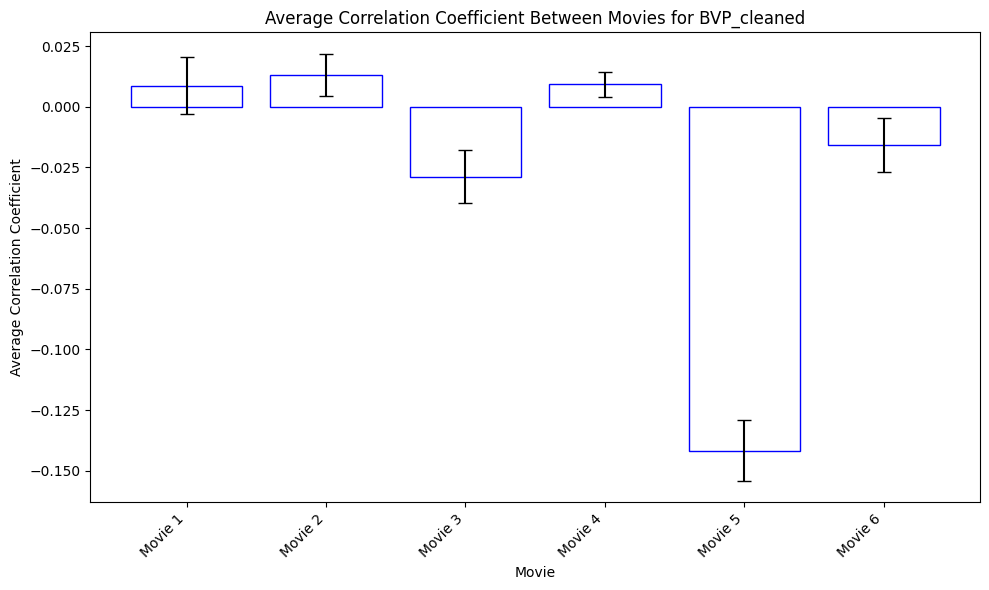

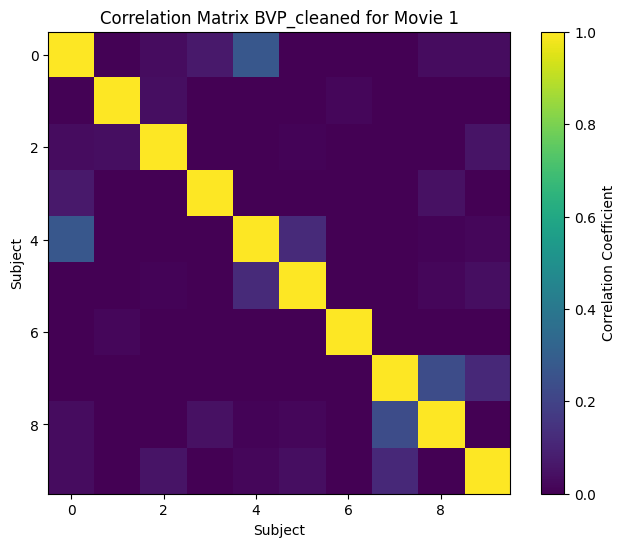

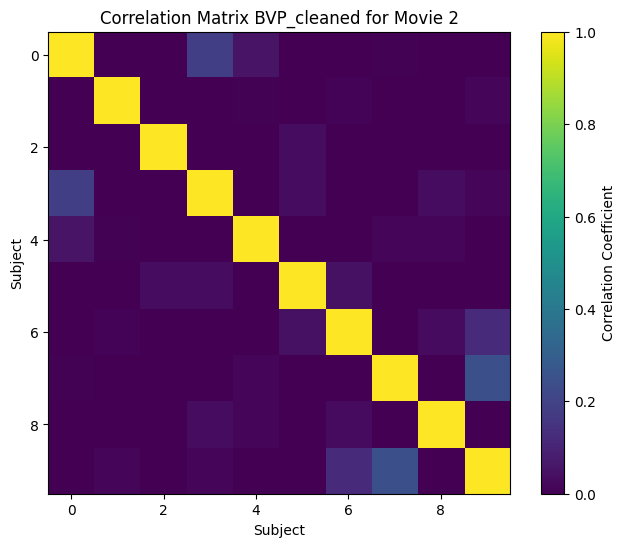

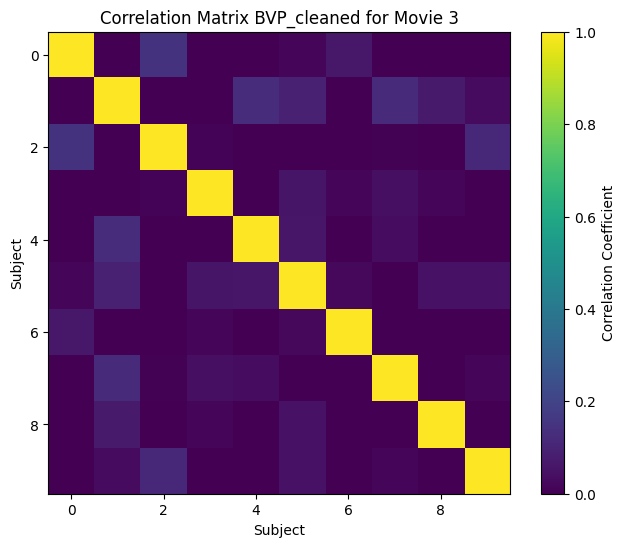

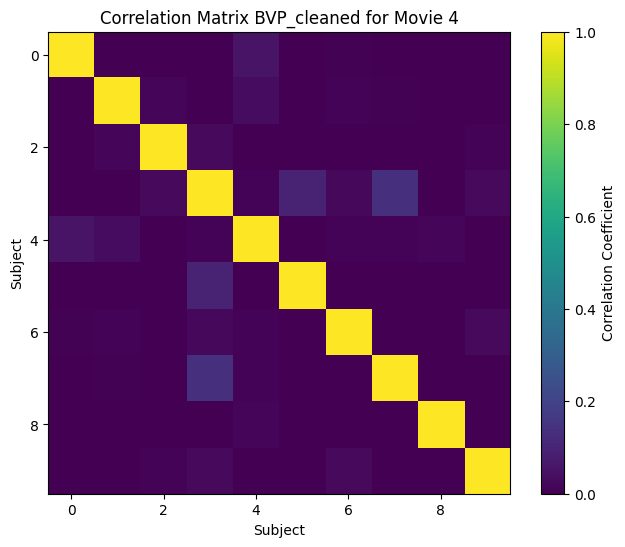

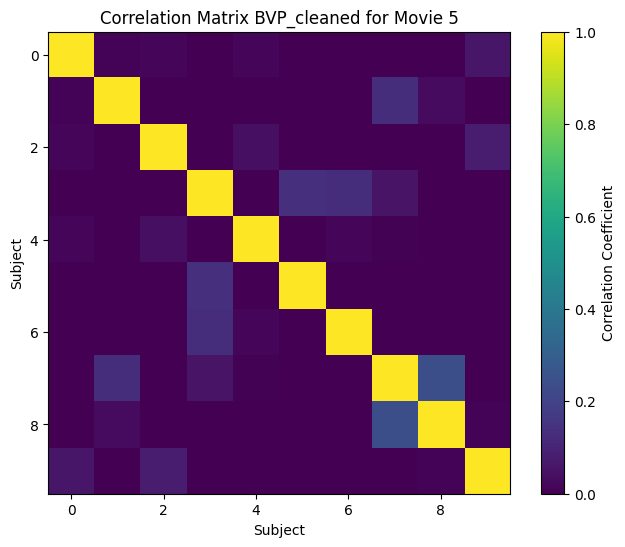

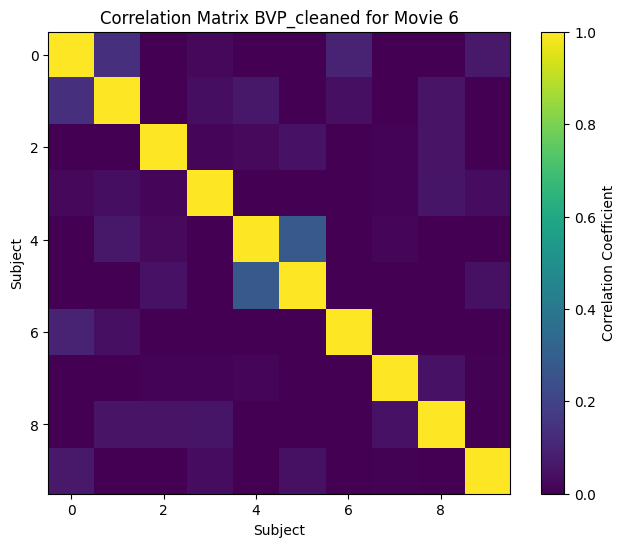

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

Data = 'BVP_cleaned'

def calculate_average_correlation(dataframes):
    total_correlation = 0
    num_correlations = 0
    
    for i in range(len(dataframes)):
        for j in range(i + 1, len(dataframes)):
            correlation = dataframes[i][Data].corr(dataframes[j][Data])
            total_correlation += correlation
            num_correlations += 1
            
    if num_correlations == 0:
        return 0  # Avoid division by zero
        
    average_correlation = total_correlation / np.sqrt(num_correlations) 
    average_correlation = average_correlation
    
    return average_correlation

def calculate_correlation_matrix(dataframes):
    num_subjects = len(dataframes)
    correlation_matrix = np.zeros((num_subjects, num_subjects))
    
    for i in range(num_subjects):
        for j in range(i, num_subjects):
            correlation = dataframes[i][Data].corr(dataframes[j][Data])
            correlation_matrix[i, j] = correlation
            correlation_matrix[j, i] = correlation
    
    return correlation_matrix

def process_movie_data(movie_folder, num_movies, num_files_per_movie):
    average_correlations = []
    dataframes_movie = []
    correlation_matrices = []
    
    for movie_num in range(1, num_movies + 1):
        movie_dataframes = []
        
        for file_num in range(1, num_files_per_movie + 1):
            df = pd.read_csv(fr"{movie_folder}\Subject {file_num}\movie_{movie_num}_opensignals.csv")
            movie_dataframes.append(df)
        
        dataframes_movie.append(movie_dataframes)
        average_correlation = calculate_average_correlation(movie_dataframes)
        average_correlations.append(average_correlation)
        
        # Calculate and store the correlation matrix
        correlation_matrix = calculate_correlation_matrix(movie_dataframes) 
        correlation_matrices.append(correlation_matrix)
    
    return dataframes_movie, average_correlations, correlation_matrices

def plot_correlation_graph(movie_names, average_correlations, sem_values):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(movie_names, average_correlations, color='white', edgecolor='blue', linewidth=1, yerr=sem_values, capsize=5)
    
    plt.xlabel('Movie')
    plt.ylabel('Average Correlation Coefficient')
    plt.title('Average Correlation Coefficient Between Movies for ' + Data)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_correlation_matrices(movie_names, correlation_matrices):
    for i, movie_name in enumerate(movie_names):
        plt.figure(figsize=(8, 6))
        plt.imshow(correlation_matrices[i], cmap='viridis', vmin=0, vmax=1)
        plt.colorbar(label='Correlation Coefficient')
        plt.title(f'Correlation Matrix ' + Data + f' for {movie_name}')
        plt.xlabel('Subject')
        plt.ylabel('Subject')
        plt.show()

movie_folder = r"C:\Users\isc\Desktop\project"
num_movies = 6  # Update this with the actual number of movies
num_files_per_movie = 10  # Update this with the actual number of files per movie

# Get the movie names
movie_names = [f"Movie {i}" for i in range(1, num_movies + 1)]

# Process the movie data
dataframes_movie, average_correlations, correlation_matrices = process_movie_data(movie_folder, num_movies, num_files_per_movie)

# Calculate SEM values
sem_values = []
for movie_df in dataframes_movie:
    correlations = [df1[Data].corr(df2[Data]) for idx, df1 in enumerate(movie_df) for df2 in movie_df[idx+1:]]
    sem = np.std(correlations) / np.sqrt(len(correlations))
    sem_values.append(sem)

# Print the results
for i, movie_name in enumerate(movie_names):
    print(f"{movie_name}:")
    print(f"  Average " + Data + f" Correlation Coefficient: {average_correlations[i]}")
    print(f"  Standard Error of Mean: {sem_values[i]}")
    print("")

# Plot the correlation graph
plot_correlation_graph(movie_names, average_correlations, sem_values)

# Plot correlation matrices
plot_correlation_matrices(movie_names, correlation_matrices)

In [6]:
#SEM

Movie 1:
  Average EDA_cleaned Correlation Coefficient: 0.5504145056069402
  Standard Error of Mean: 0.06031225316173161

Movie 2:
  Average EDA_cleaned Correlation Coefficient: 0.13394850943703193
  Standard Error of Mean: 0.07055112155426439

Movie 3:
  Average EDA_cleaned Correlation Coefficient: 0.09007001823122772
  Standard Error of Mean: 0.04426110160231572

Movie 4:
  Average EDA_cleaned Correlation Coefficient: -0.17227513668433778
  Standard Error of Mean: 0.05909474472511945

Movie 5:
  Average EDA_cleaned Correlation Coefficient: 0.6478059830951844
  Standard Error of Mean: 0.04226325128819525

Movie 6:
  Average EDA_cleaned Correlation Coefficient: -0.18100096812523672
  Standard Error of Mean: 0.04597184267673705



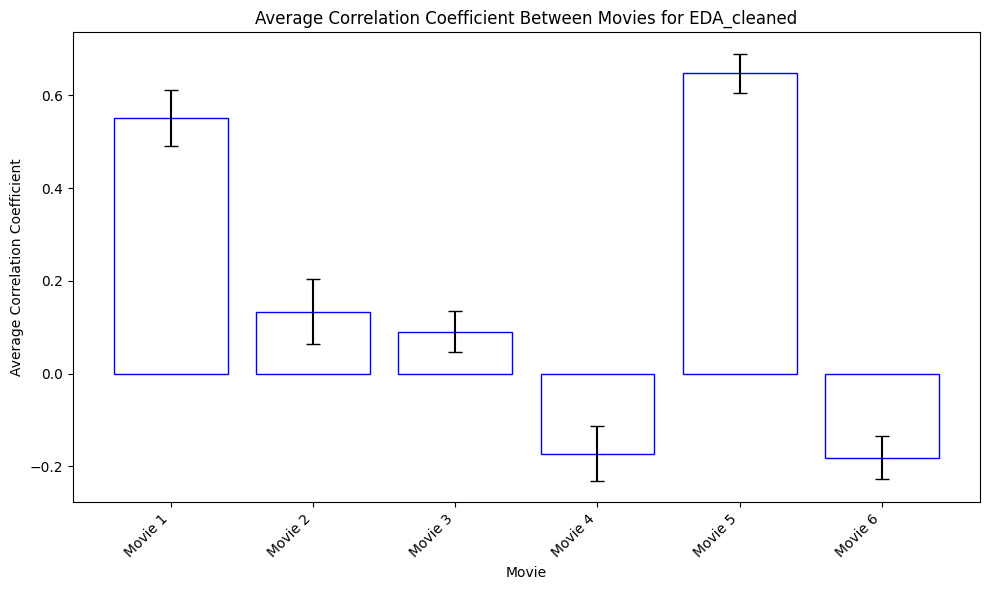

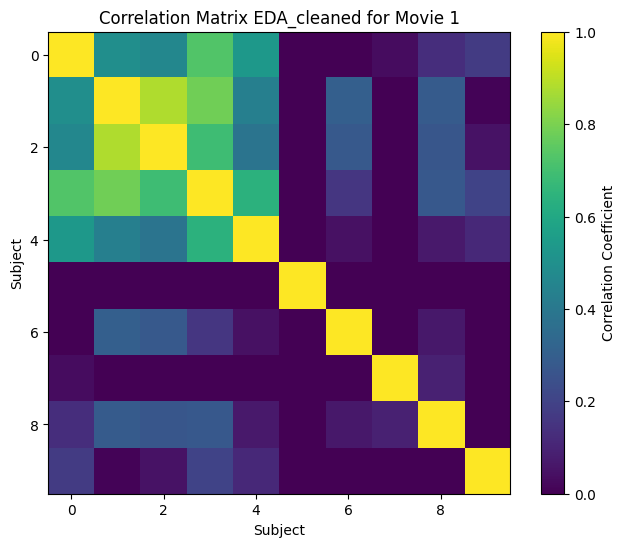

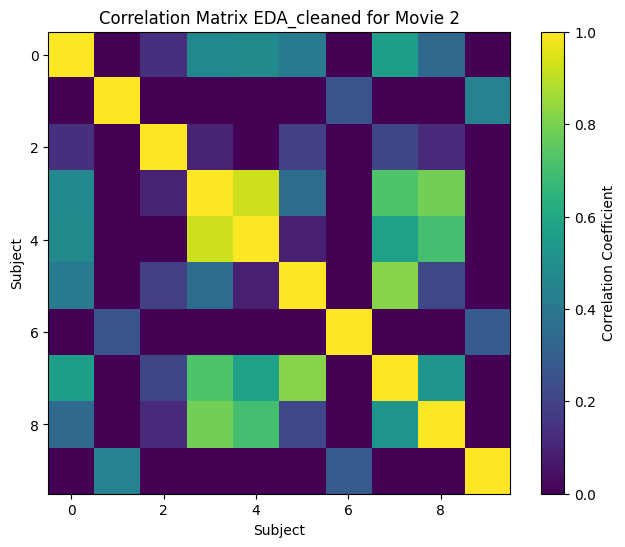

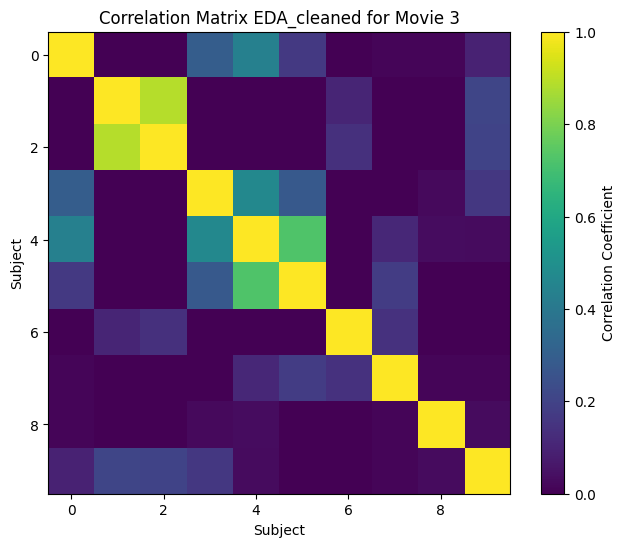

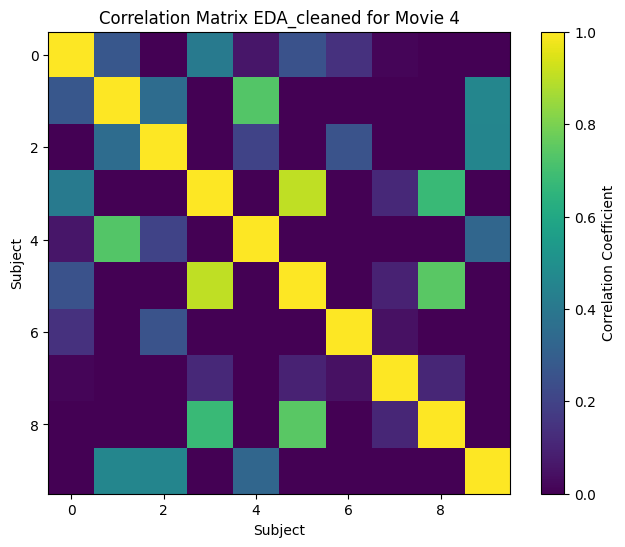

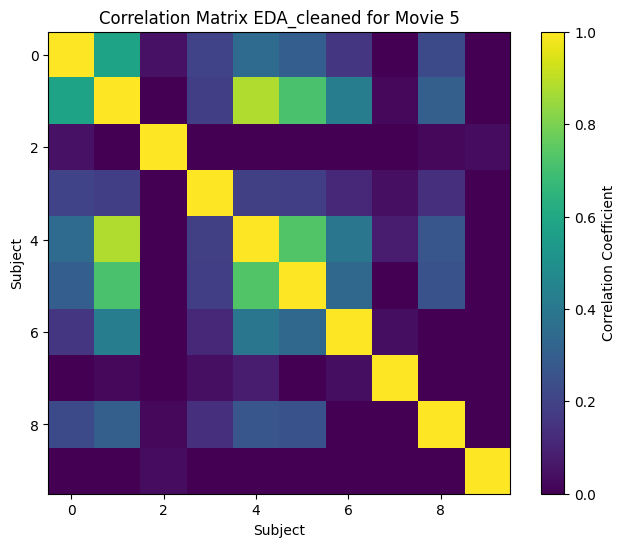

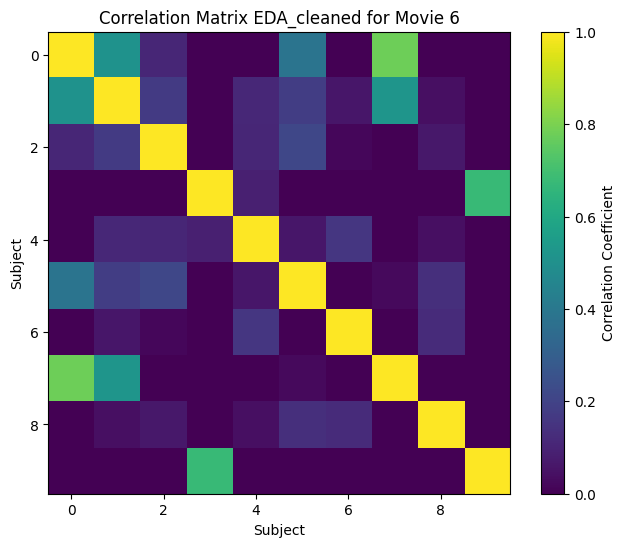

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

Data = 'EDA_cleaned'

def calculate_average_correlation(dataframes):
    total_correlation = 0
    num_correlations = 0
    
    for i in range(len(dataframes)):
        for j in range(i + 1, len(dataframes)):
            correlation = dataframes[i][Data].corr(dataframes[j][Data])
            total_correlation += correlation
            num_correlations += 1
            
    if num_correlations == 0:
        return 0  # Avoid division by zero
        
    average_correlation = total_correlation / np.sqrt(num_correlations) 
    average_correlation = average_correlation
    
    return average_correlation

def calculate_correlation_matrix(dataframes):
    num_subjects = len(dataframes)
    correlation_matrix = np.zeros((num_subjects, num_subjects))
    
    for i in range(num_subjects):
        for j in range(i, num_subjects):
            correlation = dataframes[i][Data].corr(dataframes[j][Data])
            correlation_matrix[i, j] = correlation
            correlation_matrix[j, i] = correlation
    
    return correlation_matrix

def process_movie_data(movie_folder, num_movies, num_files_per_movie):
    average_correlations = []
    dataframes_movie = []
    correlation_matrices = []
    
    for movie_num in range(1, num_movies + 1):
        movie_dataframes = []
        
        for file_num in range(1, num_files_per_movie + 1):
            df = pd.read_csv(fr"{movie_folder}\Subject {file_num}\movie_{movie_num}_opensignals.csv")
            movie_dataframes.append(df)
        
        dataframes_movie.append(movie_dataframes)
        average_correlation = calculate_average_correlation(movie_dataframes)
        average_correlations.append(average_correlation)
        
        # Calculate and store the correlation matrix
        correlation_matrix = calculate_correlation_matrix(movie_dataframes) 
        correlation_matrices.append(correlation_matrix)
    
    return dataframes_movie, average_correlations, correlation_matrices

def plot_correlation_graph(movie_names, average_correlations, sem_values):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(movie_names, average_correlations, color='white', edgecolor='blue', linewidth=1, yerr=sem_values, capsize=5)
    
    plt.xlabel('Movie')
    plt.ylabel('Average Correlation Coefficient')
    plt.title('Average Correlation Coefficient Between Movies for ' + Data)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_correlation_matrices(movie_names, correlation_matrices):
    for i, movie_name in enumerate(movie_names):
        plt.figure(figsize=(8, 6))
        plt.imshow(correlation_matrices[i], cmap='viridis', vmin=0, vmax=1)
        plt.colorbar(label='Correlation Coefficient')
        plt.title(f'Correlation Matrix ' + Data + f' for {movie_name}')
        plt.xlabel('Subject')
        plt.ylabel('Subject')
        plt.show()

movie_folder = r"C:\Users\isc\Desktop\project"
num_movies = 6  # Update this with the actual number of movies
num_files_per_movie = 10  # Update this with the actual number of files per movie

# Get the movie names
movie_names = [f"Movie {i}" for i in range(1, num_movies + 1)]

# Process the movie data
dataframes_movie, average_correlations, correlation_matrices = process_movie_data(movie_folder, num_movies, num_files_per_movie)

# Calculate SEM values
sem_values = []
for movie_df in dataframes_movie:
    correlations = [df1[Data].corr(df2[Data]) for idx, df1 in enumerate(movie_df) for df2 in movie_df[idx+1:]]
    sem = np.std(correlations) / np.sqrt(len(correlations))
    sem_values.append(sem)

# Print the results
for i, movie_name in enumerate(movie_names):
    print(f"{movie_name}:")
    print(f"  Average " + Data + f" Correlation Coefficient: {average_correlations[i]}")
    print(f"  Standard Error of Mean: {sem_values[i]}")
    print("")

# Plot the correlation graph
plot_correlation_graph(movie_names, average_correlations, sem_values)

# Plot correlation matrices
plot_correlation_matrices(movie_names, correlation_matrices)


In [10]:
import plotly.graph_objs as go

fig = go.Figure()

for i in range(len(dataframes_movie[3])):
    fig.add_trace(go.Scatter(
        y=dataframes_movie[3][i]['average_DisplayArea_x'] * 1920,
        x=dataframes_movie[3][i]['time_N'],
        mode='lines',
        name='average_DisplayArea_x_' + str(i + 1)
    ))

fig.update_layout(
    title='Movie 1',  # Replace with the appropriate movie title
    xaxis_title='Time [sec]',
    yaxis_title='Average DisplayArea_x [pixels]'
)

fig.show()


KeyError: 'z_score_average_DisplayArea_x'

In [9]:
import plotly.graph_objs as go

fig = go.Figure()

for i in range(len(dataframes_movie[3])):
    fig.add_trace(go.Scatter(
        y=dataframes_movie[3][i]['average_DisplayArea_y'] * 1080,
        x=dataframes_movie[3][i]['time_N'],
        mode='lines',
        name='average_DisplayArea_y_' + str(i + 1)
    ))

fig.update_layout(
    title='Movie 1',  # Replace with the appropriate movie title
    xaxis_title='Time [sec]',
    yaxis_title='Average DisplayArea_y [pixels]'
)

fig.show()

KeyError: 'average_DisplayArea_y'